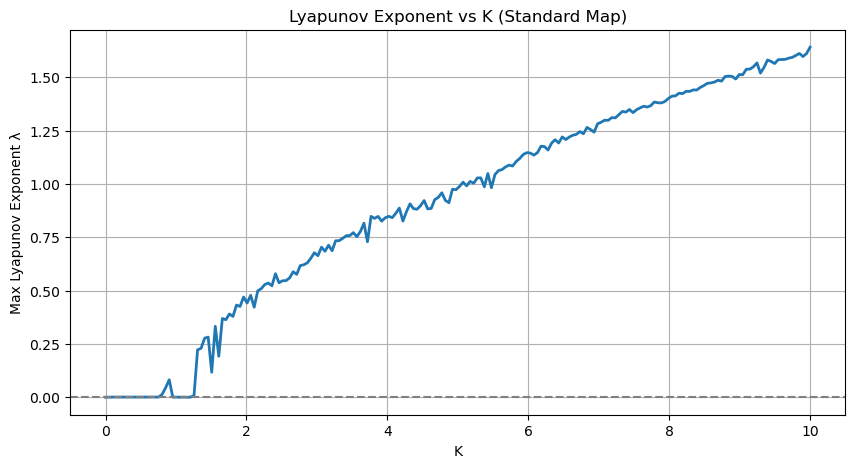

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Chirikov Standard Map
def standard_map(x, p, K):
    p_next = (p + K * np.sin(x)) % (2 * np.pi)
    x_next = (x + p_next) % (2 * np.pi)
    return x_next, p_next

# Compute Lyapunov exponent
def compute_lyapunov(K, n_iter=10000, delta0=1e-8):
    x, p = 1.0, 1.0
    x_pert, p_pert = x + delta0, p

    delta = delta0
    lyapunov_sum = 0.0

    for _ in range(n_iter):
        # Evolve both points
        x, p = standard_map(x, p, K)
        x_pert, p_pert = standard_map(x_pert, p_pert, K)

        # Compute separation vector
        dx = (x_pert - x + np.pi) % (2 * np.pi) - np.pi
        dp = (p_pert - p + np.pi) % (2 * np.pi) - np.pi
        delta_new = np.sqrt(dx**2 + dp**2)

        # Normalize perturbation to prevent overflow/underflow
        if delta_new == 0: continue
        lyapunov_sum += np.log(delta_new / delta)
        scale = delta / delta_new
        dx *= scale
        dp *= scale
        x_pert = (x + dx) % (2 * np.pi)
        p_pert = (p + dp) % (2 * np.pi)

    return lyapunov_sum / n_iter

# Plotting Lyapunov exponent vs K
K_values = np.linspace(0, 10, 200)
lyapunov_exponents = [compute_lyapunov(K) for K in K_values]

plt.figure(figsize=(10, 5))
plt.plot(K_values, lyapunov_exponents, lw=2)
plt.axhline(0, color='gray', ls='--')
plt.title('Lyapunov Exponent vs K (Standard Map)')
plt.xlabel('K')
plt.ylabel('Max Lyapunov Exponent λ')
plt.grid(True)
plt.show()

In [6]:
from math import cos, sin, pi
from numpy import cross
import numpy as np

N = 3
V_1 = [0, cos((2/ N)* 2 * pi), sin((2 / N)* 2 * pi)]
V_2 = np.array([0, cos((2 / N)* 1 * pi), sin((2 / N)* 1 * pi)]) + np.array([0, cos((2 / N)* 3 * pi), sin((2 / N)* 3 * pi)])

print(cross(V_1, V_2))

[-3.33066907e-16 -0.00000000e+00  0.00000000e+00]


In [ ]:
# Make N folders
import os

Ns = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for data_kind in os.listdir("../data2"):
    if data_kind == ".DS_Store":
        continue
    os.mkdir(f"../data2/{data_kind}/SeveralNs")
    for N_val in Ns:
        os.mkdir(f"../data2/{data_kind}/N{N_val}")

In [24]:
# Make a folders
import os

a_vals = [i/100 for i in range(50, 100, 1)]

for data_kind in os.listdir("../data2"):
    if data_kind == ".DS_Store":
        continue
    for N_val in os.listdir(f"../data2/{data_kind}"):
        if N_val == ".DS_Store":
            continue
        os.mkdir(f"../data2/{data_kind}/{N_val}/SeveralAs")
        for a_val in a_vals:
            os.mkdir(f"../data2/{data_kind}/{N_val}/a_{str(a_val).replace(".", "p")}")

In [ ]:
# Make init_cond folders
for data_kind in os.listdir("../data2"):
    if data_kind == ".DS_Store":
        continue
    for N_val in os.listdir(f"../data2/{data_kind}"):
        if N_val == ".DS_Store":
            continue
        for a_folder in os.listdir(f"../data2/{data_kind}/{N_val}"):
            if a_folder == ".DS_Store":
                continue
            # os.mkdir(f"../data2/{data_kind}/{N_val}/SeveralAs")
            # for a_val in a_vals:
            #     os.mkdir(f"../data2/{data_kind}/{N_val}/a_{str(a_val).replace(".", "p")}")